In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("insurance1.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


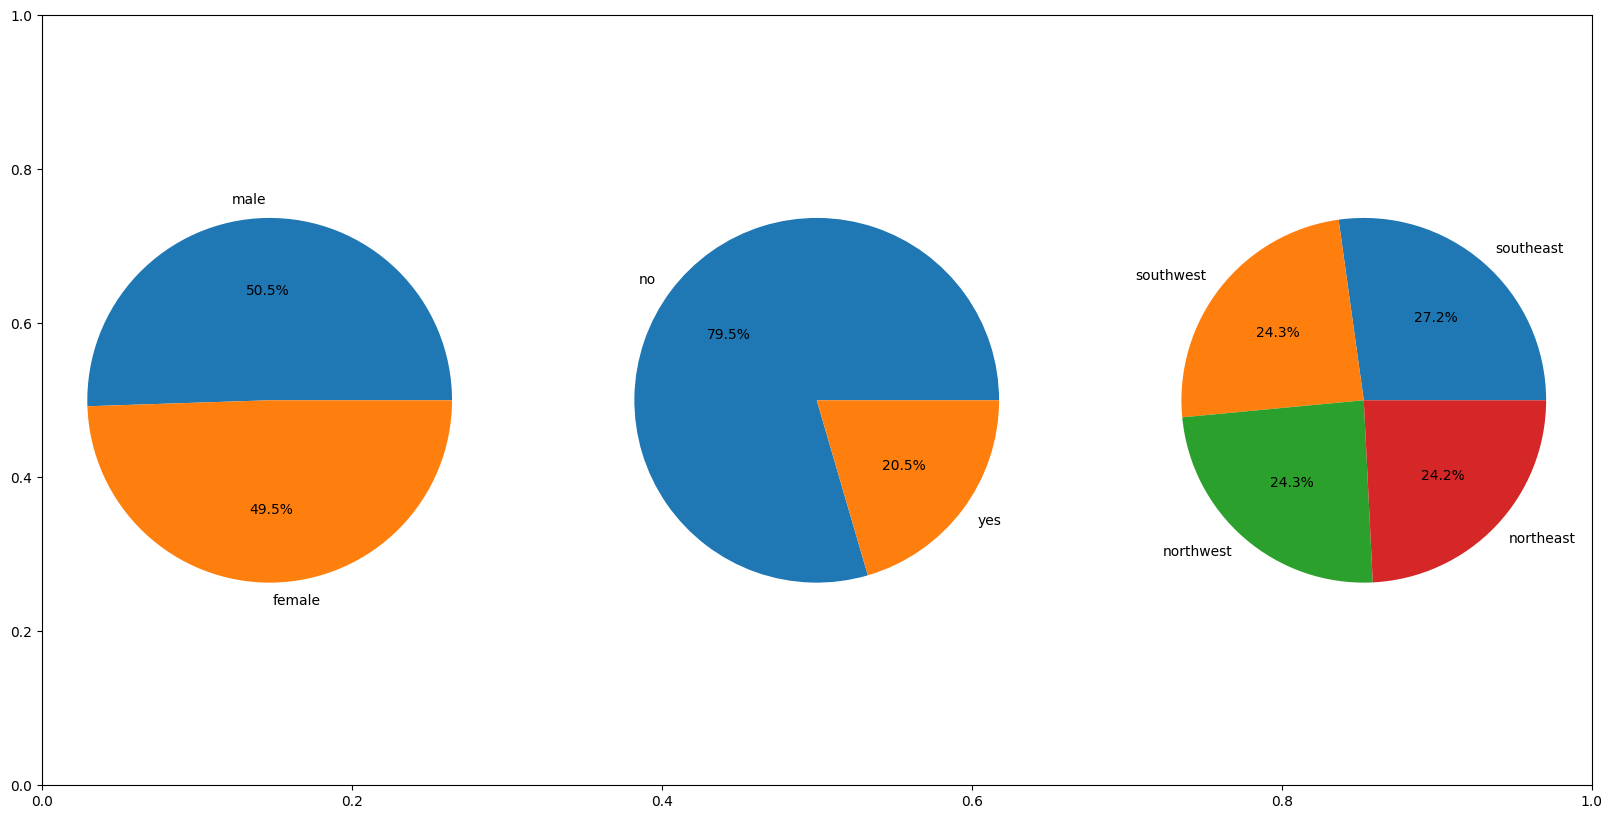

In [ ]:
import matplotlib.pyplot as plt

features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(1, 3, i + 1)

	x = df[col].value_counts()
	plt.pie(x.values,
			labels=x.index,
			autopct='%1.1f%%')

plt.show()

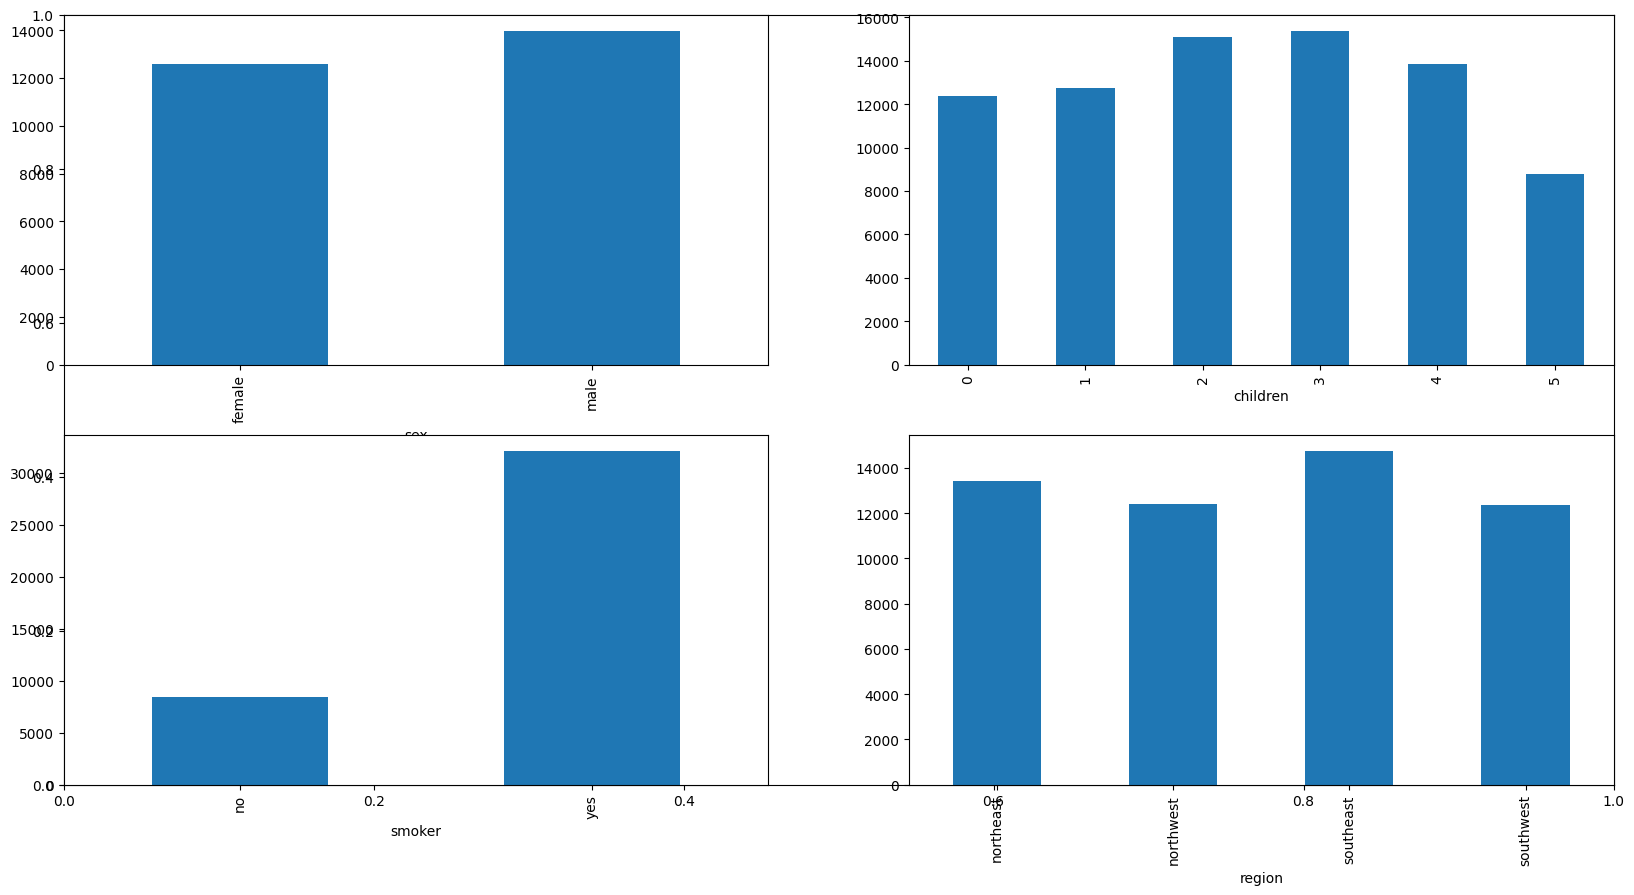

In [ ]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['charges'].mean().astype(float).plot.bar()
plt.show()

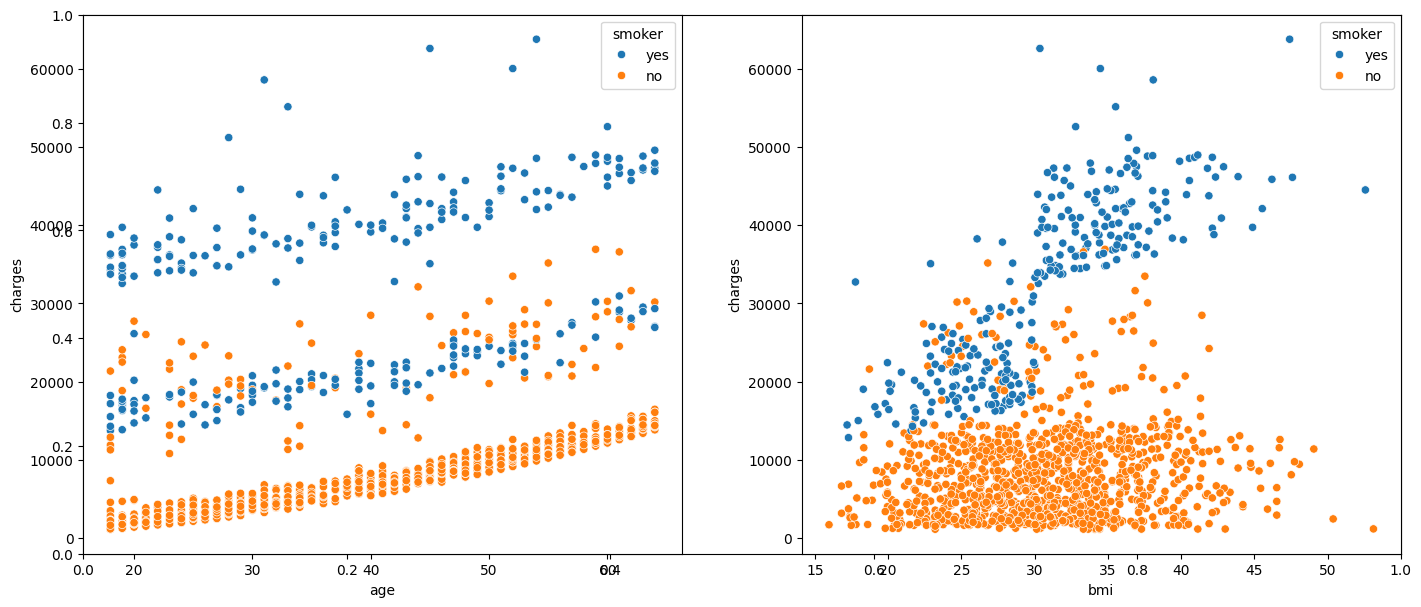

In [ ]:
import seaborn as sns
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
	plt.subplot(1, 2, i + 1)
	sns.scatterplot(data=df, x=col,
				y='charges',
				hue='smoker')
plt.show()

<Axes: ylabel='age'>

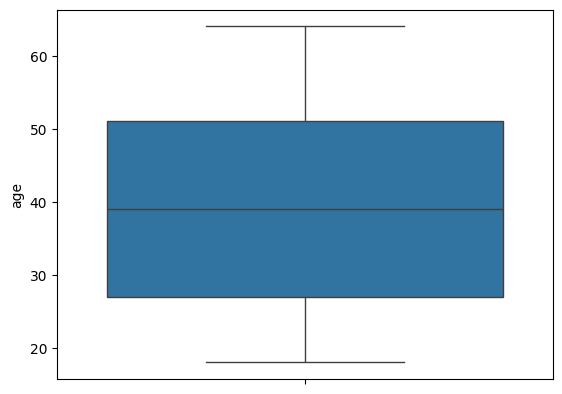

In [ ]:
df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

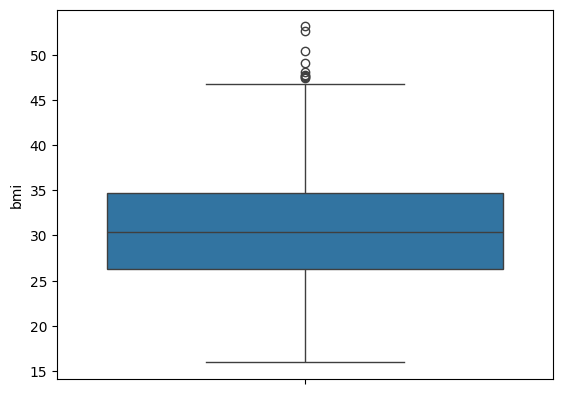

In [ ]:
sns.boxplot(df['bmi'])

This code is used to identify outliers in the 'bmi' (Body Mass Index) column of a DataFrame named df using the Interquartile Range (IQR) method.

Any bmi values below lowlim or above upplim are considered potential outliers.

In [ ]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.674999999999994
47.31500000000001


This installs the feature_engine library, which provides useful tools for feature engineering in machine learning, including outlier handling.

ArbitraryOutlierCapper class, which allows you to manually set the minimum and maximum values for a feature (in this case, bmi).

This line caps all bmi values:

Any value below 13.6749 is replaced with 13.6749.

Any value above 47.315 is replaced with 47.315.

It helps remove the impact of extreme outliers without deleting the data.

This creates a boxplot of the capped bmi values using Seaborn.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 8.8 MB/s eta 0:00:00


<Axes: ylabel='bmi'>

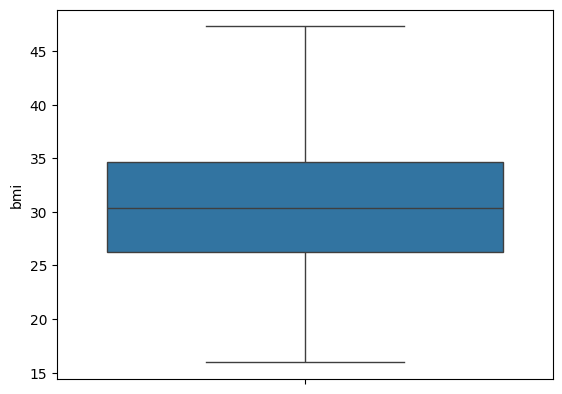

In [ ]:
!pip install feature_engine
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

calculates the skewness of the bmi column in your dataset.

In [ ]:
df['bmi'].skew()
df['age'].skew()

np.float64(0.054780773126998195)

This code is performing label encoding — converting categorical text values into numerical values

In [ ]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

correlation matrix

In [ ]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.111998,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.044831,-0.017848,-0.076596,-0.008998,-0.058044
bmi,0.111998,-0.044831,1.000000,0.013692,0.003151,0.156937,0.199063
children,0.041536,-0.017848,0.013692,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003151,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156937,-0.002842,0.012736,1.000000,0.010767
charges,0.298308,-0.058044,0.199063,0.067389,0.787234,0.010767,1.000000


This creates the feature set X by dropping the charges column (which is your target variable) from the dataset

This function is used to split the data into training and testing sets.

In [ ]:
X=df.drop(['charges'],axis=1)
Y=df[['charges']]

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


20:80 ratio splitting of data

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

importing libraries

In [ ]:

import numpy as np
import math
from collections import Counter


This code defines a custom Decision Tree Regressor for predicting continuous values by recursively splitting the dataset based on features that reduce variance the most.

Key components:

Tree Building (fit and _grow_tree):

Starts from the root and recursively splits the data.

Splitting stops if:

Max depth is reached.

All targets are the same.

Not enough samples to split further.

Best Split Selection (_best_split):

Randomly selects a subset of features (like Random Forests).

Tries all unique values as thresholds.

Chooses the split that gives the maximum variance reduction.

Prediction (predict and _predict_sample):

For each input, traverses the built tree from root to leaf.

Returns the mean value at the leaf node as the prediction.

Overall, this is a simple yet functional implementation of a decision tree regressor that supports depth limits, minimum split sizes, and random feature selection — laying the foundation for building ensemble models like Random Forests.

In [ ]:

class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2, random_state=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.random_state = random_state
        self.tree = None

    def fit(self, X, y):
        # Set random seed for reproducibility
        if self.random_state is not None:
            np.random.seed(self.random_state)

        # Convert to numpy arrays if they're not already
        X = np.array(X)
        y = np.array(y).flatten()

        # Start recursive tree building
        self.tree = self._grow_tree(X, y, depth=0)
        return self

    def _grow_tree(self, X, y, depth):
        n_samples, n_features = X.shape

        # Check stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth) or \
           n_samples < self.min_samples_split or \
           np.all(y == y[0]):
            leaf_value = np.mean(y)
            return {'type': 'leaf', 'value': leaf_value}

        # Find the best split
        best_feature, best_threshold = self._best_split(X, y)

        # If no good split is found, make this a leaf
        if best_feature is None:
            leaf_value = np.mean(y)
            return {'type': 'leaf', 'value': leaf_value}

        # Split the data
        left_indices = X[:, best_feature] <= best_threshold
        right_indices = ~left_indices

        # Check if split is meaningful
        if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
            leaf_value = np.mean(y)
            return {'type': 'leaf', 'value': leaf_value}

        # Recursive tree building for left and right branches
        left_subtree = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return {
            'type': 'node',
            'feature': best_feature,
            'threshold': best_threshold,
            'left': left_subtree,
            'right': right_subtree
        }

    def _best_split(self, X, y):
        n_samples, n_features = X.shape

        if n_samples <= 1:
            return None, None

        # Calculate current variance (before split)
        parent_var = np.var(y)

        # Initialize variables for tracking the best split
        best_var_reduction = -float('inf')
        best_feature = None
        best_threshold = None

        # Try a subset of random features (for Random Forest)
        n_features_to_consider = int(math.sqrt(n_features))
        feature_indices = np.random.choice(n_features, n_features_to_consider, replace=False)

        # For each feature
        for feature_idx in feature_indices:
            # Get unique values for the feature
            thresholds = np.unique(X[:, feature_idx])

            # For each possible threshold value
            for threshold in thresholds:
                # Split the data
                left_indices = X[:, feature_idx] <= threshold
                right_indices = ~left_indices

                # Skip if split doesn't divide the dataset
                if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
                    continue

                # Calculate variance reduction
                left_var = np.var(y[left_indices]) if np.sum(left_indices) > 1 else 0
                right_var = np.var(y[right_indices]) if np.sum(right_indices) > 1 else 0

                # Weighted variance reduction
                left_weight = np.sum(left_indices) / n_samples
                right_weight = np.sum(right_indices) / n_samples
                var_reduction = parent_var - (left_weight * left_var + right_weight * right_var)

                # Update best split if this one is better
                if var_reduction > best_var_reduction:
                    best_var_reduction = var_reduction
                    best_feature = feature_idx
                    best_threshold = threshold

        return best_feature, best_threshold

    def predict(self, X):
        X = np.array(X)
        return np.array([self._predict_sample(x, self.tree) for x in X])

    def _predict_sample(self, x, node):
        if node['type'] == 'leaf':
            return node['value']

        if x[node['feature']] <= node['threshold']:
            return self._predict_sample(x, node['left'])
        else:
            return self._predict_sample(x, node['right'])

This code implements a Random Forest Regressor from scratch using multiple decision trees to make accurate predictions on continuous data.

 Key Components:
Initialization (__init__)

Defines parameters: number of trees, max tree depth, minimum samples to split, and random seed.

Initializes an empty list to store trees.

Model Training (fit)

Converts input to NumPy arrays.

For each tree:

Creates a bootstrap sample (random rows with replacement).

Trains a custom DecisionTreeRegressor on the sample.

Adds the trained tree to the forest.

Prediction (predict)

Each tree predicts on the input data.

Final prediction = average of all tree predictions.

Feature Importance (get_feature_importances)

For each tree, recursively counts how often each feature is used for splitting.

Combines and normalizes these counts across all trees to get relative feature importance scores.

In [ ]:
class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.random_state = random_state
        self.trees = []

    def fit(self, X, y):
        # Convert to numpy arrays
        X = np.array(X)
        y = np.array(y).flatten()

        # Initialize random state
        if self.random_state is not None:
            np.random.seed(self.random_state)

        # Train each tree
        for i in range(self.n_estimators):
            # Create a bootstrap sample
            n_samples = X.shape[0]
            bootstrap_indices = np.random.choice(n_samples, n_samples, replace=True)
            X_bootstrap = X[bootstrap_indices]
            y_bootstrap = y[bootstrap_indices]

            # Create and train a decision tree
            tree = DecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                random_state=self.random_state + i if self.random_state is not None else None
            )
            tree.fit(X_bootstrap, y_bootstrap)
            self.trees.append(tree)

        return self

    def predict(self, X):
        X = np.array(X)
        # Get predictions from all trees
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        # Return the average prediction
        return np.mean(tree_predictions, axis=0)

    def get_feature_importances(self):
        """
        Calculate feature importances for the random forest model.

        Returns:
            numpy array of feature importances, summing to 1.0
        """
        if not self.trees:
            raise ValueError("Model hasn't been trained yet")

        # Get number of features from the training data
        n_features = len(X.columns) if hasattr(X, 'columns') else X.shape[1]

        # Initialize importance array
        importances = np.zeros(n_features)

        # For each tree in the forest
        for tree in self.trees:
            # Collect feature importance from this tree
            tree_importances = self._get_tree_feature_importance(tree.tree, n_features)
            importances += tree_importances

        # Normalize importances
        if np.sum(importances) > 0:
            importances = importances / np.sum(importances)

        return importances

    def _get_tree_feature_importance(self, node, n_features):
        """
        Recursively collect feature importance from a decision tree.

        Args:
            node: Current tree node
            n_features: Total number of features

        Returns:
            Importance values for features in this tree
        """
        # Initialize importance array for this tree
        importances = np.zeros(n_features)

        # If leaf node, return zeros
        if node['type'] == 'leaf':
            return importances

        # Get feature index for this node
        feature_idx = node['feature']

        # Update importance for this feature
        importances[feature_idx] += 1

        # Recursively get importance from child nodes
        left_importance = self._get_tree_feature_importance(node['left'], n_features)
        right_importance = self._get_tree_feature_importance(node['right'], n_features)

        # Combine importances
        importances += left_importance + right_importance

        return importances

This function manually implements the R² score (coefficient of determination), which measures how well the predicted values approximate the actual values in regression.

Key Steps:
Input Conversion

Converts both y_true and y_pred to flattened NumPy arrays to ensure consistency.

Mean of True Values

Calculates the mean of the actual target values:

𝑦
ˉ
=
1
𝑛
∑
𝑦
𝑖
y
ˉ
​
 =
n
1
​
 ∑y
i
​

Total Sum of Squares (SST)

Measures total variance in actual values:

𝑆
𝑆
𝑡
𝑜
𝑡
𝑎
𝑙
=
∑
(
𝑦
𝑖
−
𝑦
ˉ
)
2
SS
total
​
 =∑(y
i
​
 −
y
ˉ
​
 )
2

Residual Sum of Squares (SSR)

Measures the error between actual and predicted values:

𝑆
𝑆
𝑟
𝑒
𝑠
𝑖
𝑑
𝑢
𝑎
𝑙
=
∑
(
𝑦
𝑖
−
𝑦
^
𝑖
)
2
SS
residual
​
 =∑(y
i
​
 −
y
^
​
  
i
​
 )
2

R² Score Calculation

Computes the R² score using:

𝑅
2
=
1
−
𝑆
𝑆
𝑟
𝑒
𝑠
𝑖
𝑑
𝑢
𝑎
𝑙
𝑆
𝑆
𝑡
𝑜
𝑡
𝑎
𝑙
R
2
 =1−
SS
total
​

SS
residual
​

​

 Interpretation:
R² = 1: Perfect prediction

R² = 0: Model performs as poorly as predicting the mean

R² < 0: Model is worse than predicting the mean

In [ ]:
# Implementing r2_score and cross_val_score
def r2_score(y_true, y_pred):
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()

    # Calculate the mean of y_true
    y_mean = np.mean(y_true)

    # Calculate total sum of squares
    ss_total = np.sum((y_true - y_mean) ** 2)

    # Calculate residual sum of squares
    ss_residual = np.sum((y_true - y_pred) ** 2)

    # Calculate R2 score
    r2 = 1 - (ss_residual / ss_total)

    return r2

This function performs cross-validation for any regression model (like your custom RandomForestRegressor) and returns R² scores for each fold.

Step-by-Step Breakdown:
Input Preparation

Converts X and y to NumPy arrays and flattens y.

Cross-Validation Setup

Shuffles the dataset randomly.

Splits the data into cv (default 5) folds of equal size.

Loop Through Folds

For each fold:

Split the data into training and testing subsets.

Reinitialize the estimator (model) from scratch to avoid data leakage or reuse.

Train the model on the training data.

Predict on the test fold.

Evaluate using the custom r2_score function.

Append the score to the list.

Return Result

Returns an array of R² scores from each fold.

In [ ]:

def cross_val_score(estimator, X, y, cv=5):
    X = np.array(X)
    y = np.array(y).flatten()

    # Generate indices for CV folds
    n_samples = X.shape[0]
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    fold_size = n_samples // cv

    scores = []
    for i in range(cv):
        # Get test indices for this fold
        test_start = i * fold_size
        test_end = (i + 1) * fold_size if i < cv - 1 else n_samples
        test_indices = indices[test_start:test_end]
        train_indices = np.array([idx for idx in indices if idx not in test_indices])

        # Split data
        X_train, y_train = X[train_indices], y[train_indices]
        X_test, y_test = X[test_indices], y[test_indices]

        # Train and evaluate model
        if isinstance(estimator, RandomForestRegressor):
            model = RandomForestRegressor(
                n_estimators=estimator.n_estimators,
                max_depth=estimator.max_depth,
                min_samples_split=estimator.min_samples_split,
                random_state=estimator.random_state
            )
        else:
            # For compatibility with other models
            model = estimator.__class__(**{k: v for k, v in estimator.__dict__.items()
                                     if not k.startswith('_') and k != 'trees'})

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = r2_score(y_test, y_pred)
        scores.append(score)

    return np.array(scores)



 Purpose:
To find the best hyperparameter combination for a given model (estimator) by:

Trying all combinations of parameters from param_grid

Evaluating each using cross-validation (cv)

Choosing the one with the highest average R² score (default scoring metric)

 How It Works (Step-by-Step):
1. Initialization
Takes in:

estimator: The model (e.g., RandomForestRegressor)

param_grid: Dictionary of parameters to tune

scoring: Evaluation metric (only "r2" supported in this version)

cv: Number of cross-validation folds

2. fit(X, y) Method
Converts input data to NumPy arrays.

Generates all combinations of parameters.

For each combination:

Creates a new estimator with the combination.

Evaluates it using custom cross_val_score.

Stores mean score and per-fold scores.

Tracks the best parameters and best score.

3. cv_results_
Dictionary that stores:

Each parameter combination

Its cross-validation scores

Its average score

4. best_params_ and best_score_
After .fit(), you can access:

best_params_: Best-performing parameter combination

best_score_: Its corresponding mean R² score

In [ ]:
class GridSearchCV:
    def __init__(self, estimator, param_grid, scoring="r2", cv=5):
        self.estimator = estimator
        self.param_grid = param_grid
        self.scoring = scoring
        self.cv = cv
        self.best_params_ = None
        self.best_score_ = -float('inf')
        self.cv_results_ = {}

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y).flatten()

        # For each combination of parameters
        param_keys = list(self.param_grid.keys())
        param_values = list(self.param_grid.values())

        # Generate all combinations of parameters
        param_combinations = self._generate_param_combinations(param_keys, param_values)

        for params in param_combinations:
            # Get base parameters from estimator (excluding internal state)
            base_params = {k: v for k, v in self.estimator.__dict__.items()
                           if not k.startswith('_') and k != 'trees'}

            # Create a new estimator with these parameters
            model = self.estimator.__class__(**{**base_params, **params})

            # Evaluate model with cross-validation
            scores = cross_val_score(model, X, y, cv=self.cv)
            mean_score = np.mean(scores)

            # Save results
            param_key = str(params)
            self.cv_results_[param_key] = {
                'params': params,
                'mean_score': mean_score,
                'scores': scores
            }

            # Update best parameters if needed
            if mean_score > self.best_score_:
                self.best_score_ = mean_score
                self.best_params_ = params

        return self

    def _generate_param_combinations(self, keys, values, i=0, current={}):
        if i == len(keys):
            return [current.copy()]

        result = []
        for value in values[i]:
            current[keys[i]] = value
            result.extend(self._generate_param_combinations(keys, values, i + 1, current))

        return result

This function helps analyze and visualize the importance of features in a trained model like a custom RandomForestRegressor.

Purpose:
To:

Calculate feature importances using the model

Display them numerically and graphically using:

A bar chart

A pie chart

 Step-by-Step Breakdown:
Get Feature Importances:

Calls the model’s .get_feature_importances() method.

Assumes the model supports this function and returns normalized values (summing to 1).

Create and Sort Dictionary:

Maps feature names to their importance scores.

Sorts them from most to least important.

Print Importances:

Shows a ranked list of features along with:

Their raw importance score

Their percentage contribution (e.g., 20%)

Bar Chart:

X-axis: Feature names

Y-axis: Importance values

Labels each bar with its exact value for clarity.

Pie Chart:

Shows proportion of total importance each feature holds.

Good for understanding relative dominance visually.

Returns:

A dictionary of {feature_name: importance} for programmatic access.

In [ ]:

# Function to visualize feature importance
def visualize_feature_importance(model, model_name, feature_names):
    import matplotlib.pyplot as plt

    # Calculate feature importances
    importances = model.get_feature_importances()

    # Create a dictionary of feature names and their importances
    feature_importance_dict = dict(zip(feature_names, importances))

    # Sort features by importance in descending order
    sorted_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

    # Print feature importances
    print(f"\nFeature Importances for {model_name}:")
    for feature, importance in sorted_importances:
        print(f"{feature}: {importance:.4f} ({importance*100:.2f}%)")

    # Extract feature names and importance values from sorted list
    features = [x[0] for x in sorted_importances]
    values = [x[1] for x in sorted_importances]

    # Create bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(features, values)

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{height:.4f}', ha='center', va='bottom')

    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title(f'Feature Importance in {model_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Create pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(values, labels=features, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.axis('equal')
    plt.title(f'Feature Importance Distribution for {model_name}')
    plt.tight_layout()
    plt.show()

    return feature_importance_dict

This is the main script that applies your custom RandomForestRegressor to a dataset (likely insurance data), evaluates its performance, tunes it with GridSearchCV, and visualizes feature importances.

Part-by-Part Breakdown:
 Part 1: Default Random Forest Model
Creates a RandomForestRegressor with default parameters.

Fits it on training data (xtrain, ytrain).

Evaluates using:

R² score on training and test sets

5-fold cross-validation score

Visualizes feature importance via bar chart and pie chart.

 Part 2: Hyperparameter Tuning with Grid Search
Uses your custom GridSearchCV class.

Searches over different values of n_estimators (number of trees).

Uses R² as the scoring metric and 5-fold cross-validation.

Prints the best number of estimators found.

 Part 3: Optimized Random Forest Model
Builds and trains a new RandomForestRegressor using the best parameters.

Re-evaluates the model (train/test R² + cross-val).

Visualizes new feature importances.

Final Comparison:
Side-by-side bar chart comparing feature importances of:

Default model

Optimized model

Prints a ranked list of the top 3 most important features based on the optimized model.

Final Output:
Clear model performance metrics

Graphs showing which features matter most

Explanation of which features drive insurance cost predictions


----- Default Random Forest Model -----
R2 score (Train): 0.9466249633583584
R2 score (Test): 0.8830432468882587
Cross-val score: 0.847765515140048

Feature Importances for Default Random Forest:
bmi: 0.3231 (32.31%)
age: 0.2994 (29.94%)
region: 0.1454 (14.54%)
children: 0.1431 (14.31%)
sex: 0.0754 (7.54%)
smoker: 0.0136 (1.36%)


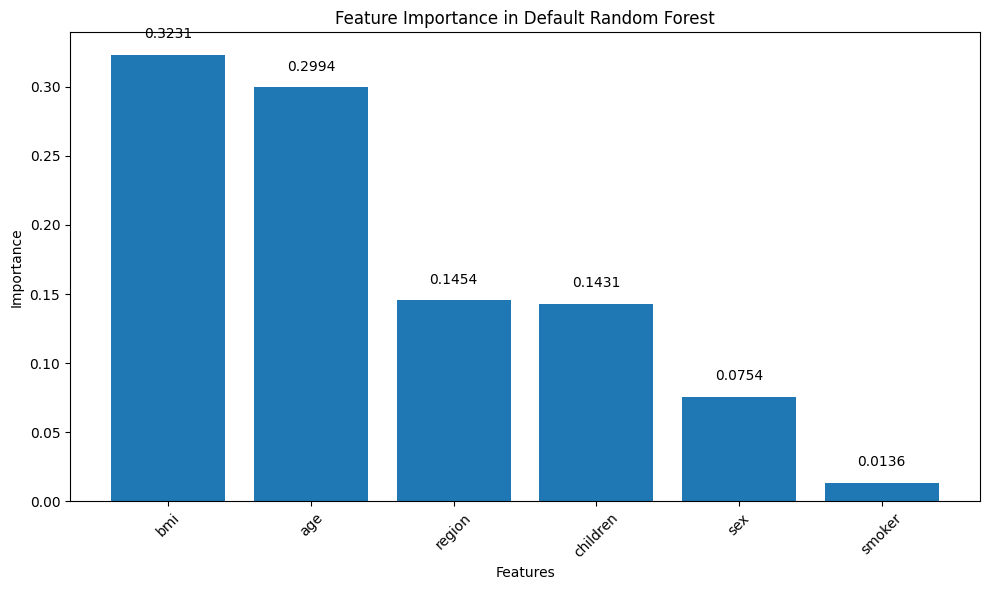

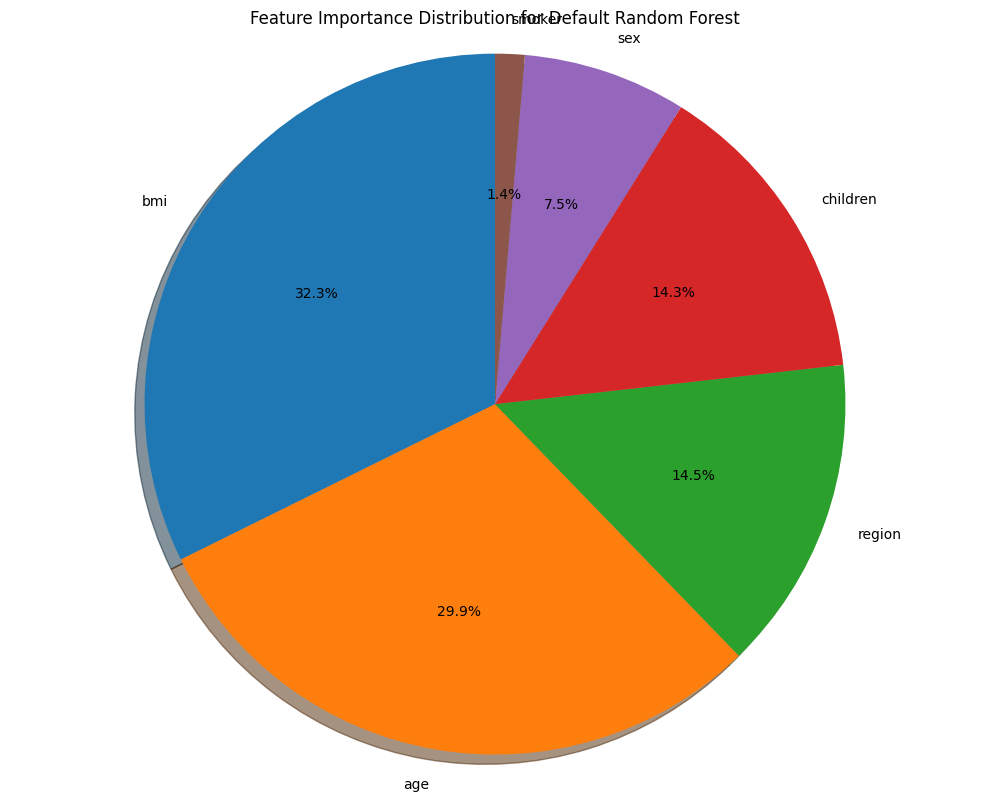


----- Grid Search for Optimal Parameters -----
Best parameters: {'n_estimators': 40}

----- Optimized Random Forest Model -----
R2 score (Train): 0.9444417445469254
R2 score (Test): 0.88501283928844
Cross-val score: 0.8440400997828543

Feature Importances for Optimized Random Forest:
bmi: 0.3239 (32.39%)
age: 0.3011 (30.11%)
children: 0.1456 (14.56%)
region: 0.1438 (14.38%)
sex: 0.0736 (7.36%)
smoker: 0.0121 (1.21%)


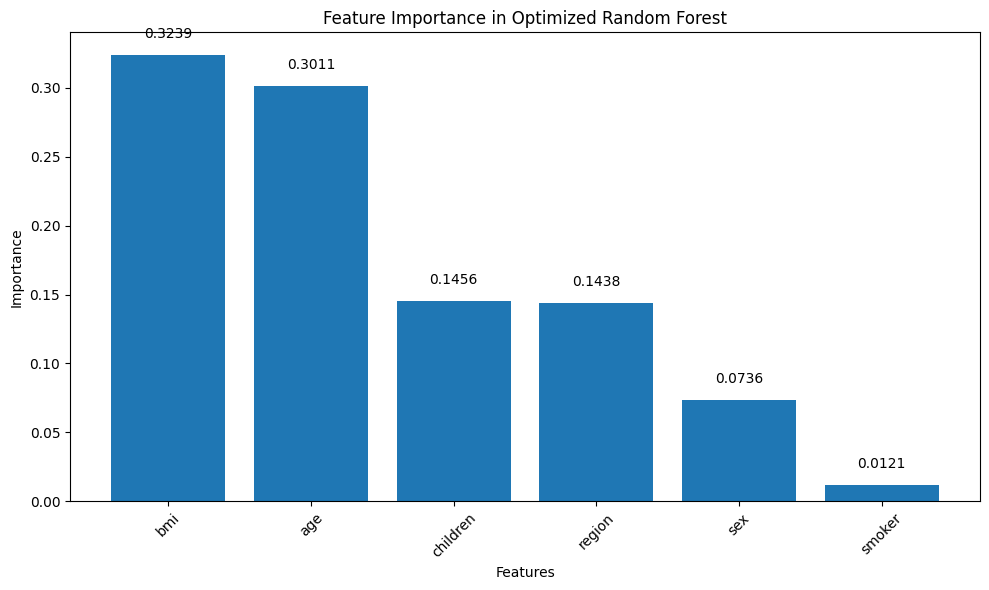

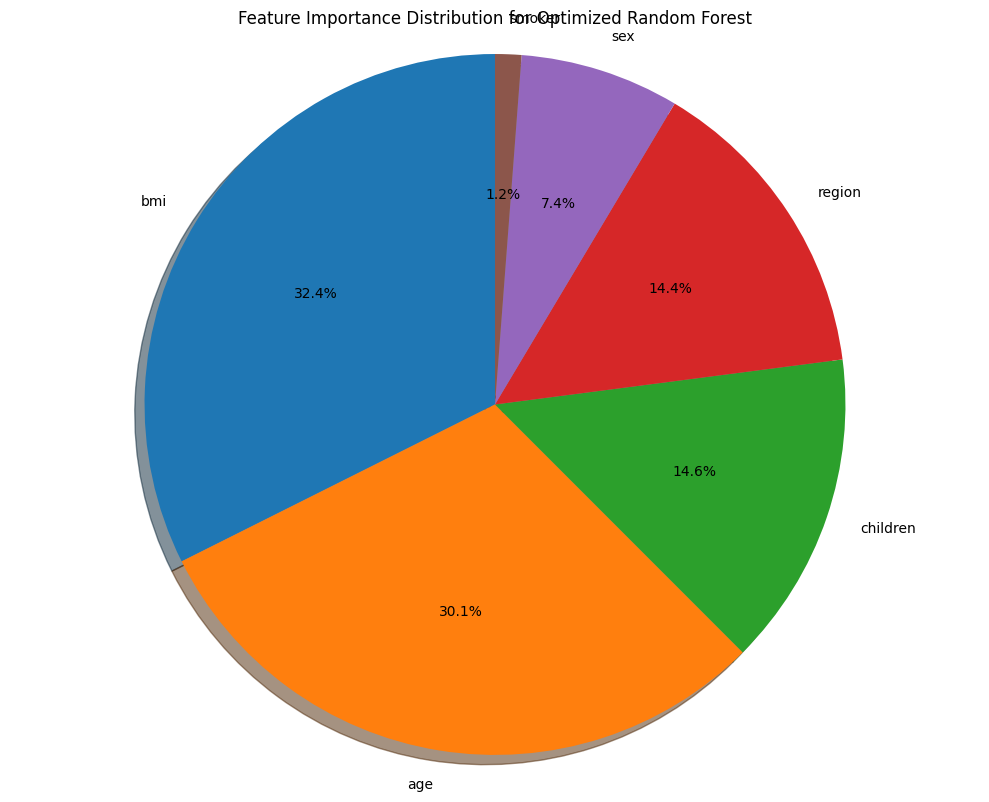


----- Comparing Feature Importances -----


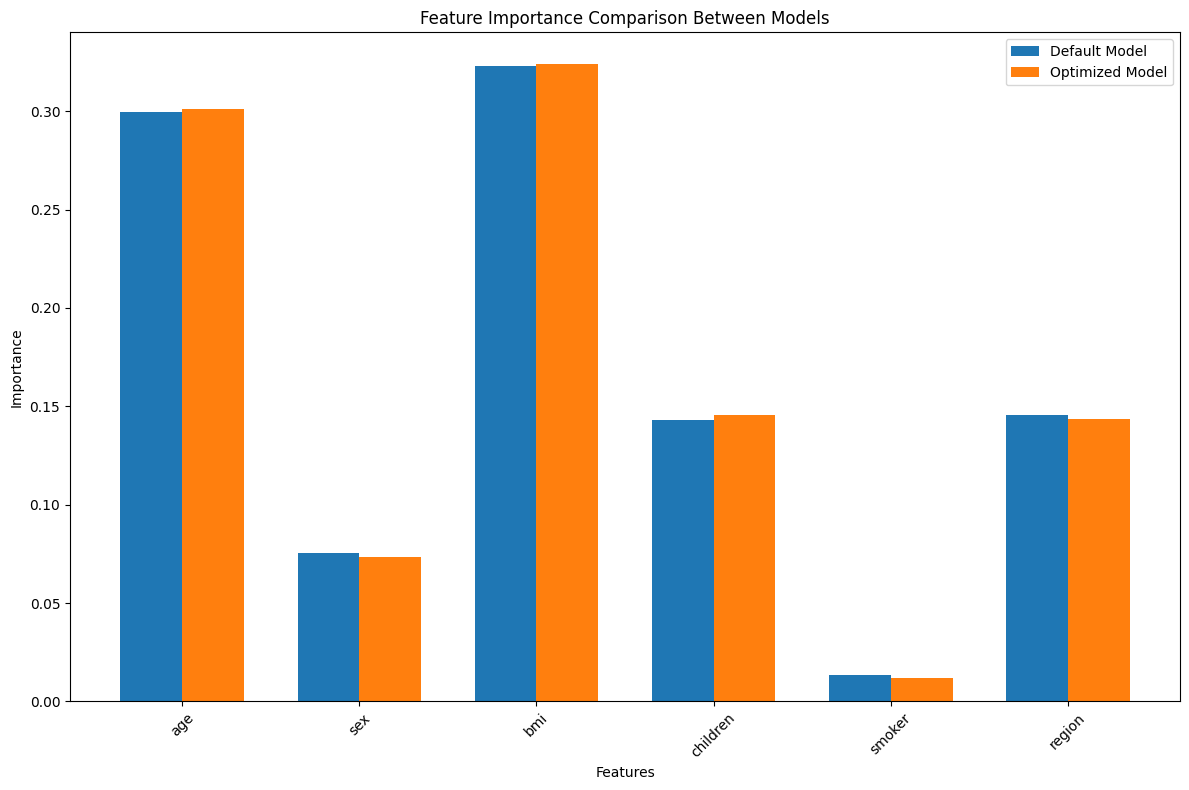


Conclusion:
The most important features for predicting insurance charges are:
1. bmi - 0.3239 (32.39%)
2. age - 0.3011 (30.11%)
3. children - 0.1456 (14.56%)


In [ ]:
# Main execution code
if __name__ == "__main__":
    # Define feature names based on your dataset
    feature_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

    # PART 1: Default Random Forest Model
    print("\n----- Default Random Forest Model -----")
    rfmodel = RandomForestRegressor(random_state=42)
    rfmodel.fit(xtrain, ytrain)

    # Predict and evaluate
    ypredtrain = rfmodel.predict(xtrain)
    ypredtest = rfmodel.predict(xtest)
    print("R2 score (Train):", r2_score(ytrain, ypredtrain))
    print("R2 score (Test):", r2_score(ytest, ypredtest))
    print("Cross-val score:", cross_val_score(rfmodel, X, Y, cv=5).mean())

    # Calculate and visualize feature importance for default model
    default_importances = visualize_feature_importance(rfmodel, "Default Random Forest", feature_names)

    # PART 2: Grid Search for optimal parameters
    print("\n----- Grid Search for Optimal Parameters -----")
    estimator = RandomForestRegressor(random_state=42)
    param_grid = {'n_estimators': [10, 40, 50, 98, 100, 120, 150]}
    grid = GridSearchCV(estimator, param_grid, scoring="r2", cv=5)
    grid.fit(xtrain, ytrain)
    print("Best parameters:", grid.best_params_)

    # PART 3: Optimized Random Forest Model
    print("\n----- Optimized Random Forest Model -----")
    rfmodel_optimized = RandomForestRegressor(random_state=42, n_estimators=grid.best_params_['n_estimators'])
    rfmodel_optimized.fit(xtrain, ytrain)

    # Predict and evaluate
    ypredtrain2 = rfmodel_optimized.predict(xtrain)
    ypredtest2 = rfmodel_optimized.predict(xtest)
    print("R2 score (Train):", r2_score(ytrain, ypredtrain2))
    print("R2 score (Test):", r2_score(ytest, ypredtest2))
    print("Cross-val score:", cross_val_score(rfmodel_optimized, X, Y, cv=5).mean())

    # Calculate and visualize feature importance for optimized model
    optimized_importances = visualize_feature_importance(rfmodel_optimized, "Optimized Random Forest", feature_names)

    # Compare feature importances between the two models
    print("\n----- Comparing Feature Importances -----")
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 8))

    # Set width of bars
    bar_width = 0.35
    index = np.arange(len(feature_names))

    # Get features in the same order for both models
    default_values = [default_importances[f] for f in feature_names]
    optimized_values = [optimized_importances[f] for f in feature_names]

    # Create bars
    bars1 = plt.bar(index, default_values, bar_width, label='Default Model')
    bars2 = plt.bar(index + bar_width, optimized_values, bar_width, label='Optimized Model')

    # Add labels and title
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importance Comparison Between Models')
    plt.xticks(index + bar_width / 2, feature_names, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Print conclusion
    print("\nConclusion:")
    print("The most important features for predicting insurance charges are:")
    sorted_features = sorted(optimized_importances.items(), key=lambda x: x[1], reverse=True)
    for i, (feature, importance) in enumerate(sorted_features[:3], 1):
        print(f"{i}. {feature} - {importance:.4f} ({importance*100:.2f}%)")